In [3]:
pip install kaggle

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [5]:
# Download the dataset
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection
!unzip brain-mri-images-for-brain-tumor-detection.zip -d data/

Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection
License(s): copyright-authors
brain-mri-images-for-brain-tumor-detection.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  brain-mri-images-for-brain-tumor-detection.zip
replace data/brain_tumor_dataset/no/1 no.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [6]:
# Set data paths
data_dir = 'data/brain_tumor_dataset'
categories = ['yes', 'no']

In [7]:
import glob
import cv2

In [8]:
# Initialize lists to hold the images and labels
tumor = []
healthy = []

# Load tumor images
for f in glob.iglob("./data/brain_tumor_dataset/yes/*.jpg"):
    img = cv2.imread(f)
    img = cv2.resize(img, (128, 128))
    b, g, r = cv2.split(img)
    img = cv2.merge([r, g, b])
    tumor.append(img)

# Load healthy images
for f in glob.iglob("./data/brain_tumor_dataset/no/*.jpg"):
    img = cv2.imread(f)
    img = cv2.resize(img, (128, 128))
    b, g, r = cv2.split(img)
    img = cv2.merge([r, g, b])
    healthy.append(img)

In [9]:
# Convert lists to numpy arrays
tumor = np.array(tumor)
healthy = np.array(healthy)
All = np.concatenate((healthy, tumor))

In [10]:
healthy.shape

(85, 128, 128, 3)

In [11]:
tumor.shape

(86, 128, 128, 3)

In [12]:
np.random.choice(10, 5, replace=False)

array([2, 7, 6, 5, 9])

#Visualizing the MRI Dataset

In [13]:
import random

In [14]:
def plot_random(healthy, tumor, num=5):
    healthy_imgs = healthy[np.random.choice(healthy.shape[0], num, replace=False)]
    tumor_imgs = tumor[np.random.choice(tumor.shape[0], num, replace=False)]

    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('healthy')
        plt.imshow(healthy_imgs[i])

    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('tumor')
        plt.imshow(tumor_imgs[i])

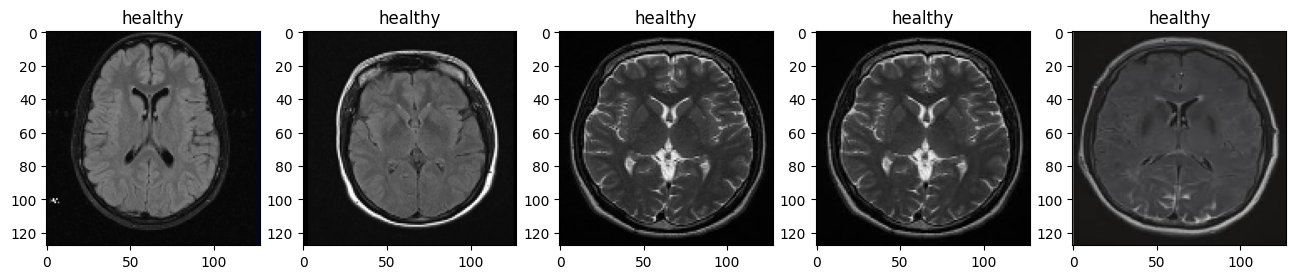

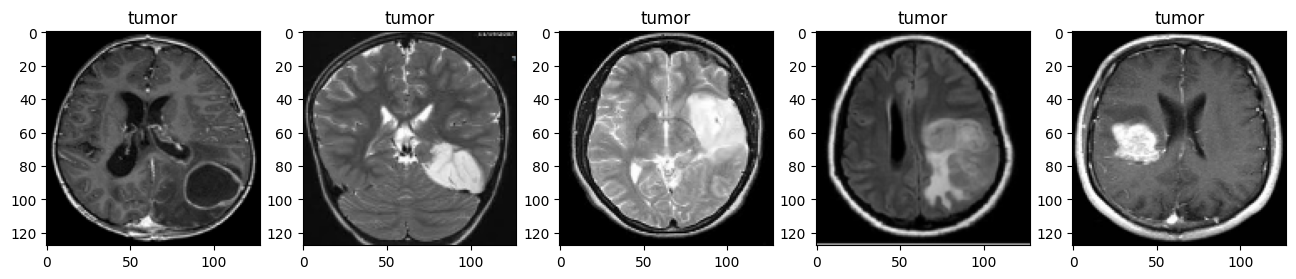

In [15]:
plot_random(healthy, tumor, num=5)

In [16]:
# Create labels
tumor_labels = np.ones(len(tumor))
healthy_labels = np.zeros(len(healthy))

In [17]:
# Combine the data and labels
X = np.concatenate((tumor, healthy), axis=0)
y = np.concatenate((tumor_labels, healthy_labels), axis=0)

In [18]:
# Normalize the data
X = X / 255.0

In [19]:
# Convert labels to categorical
y = to_categorical(y, num_classes=2)

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Design a CNN Model

In [21]:
def create_cnn_model(input_shape, num_classes, dropout_rate=0.5):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(num_classes, activation='softmax')
    ])
    return model

input_shape = (128, 128, 3)
num_classes = len(categories)
dropout_rate = 0.5  # Hyperparameter
model = create_cnn_model(input_shape, num_classes, dropout_rate)

In [22]:
# Compile the model
learning_rate = 0.001  # Hyperparameter
# optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Train the Model

In [23]:
# Hyperparameters
batch_size = 32
epochs = 25

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/25
5/5 [==============================] - 6s 949ms/step - loss: 1.0906 - accuracy: 0.5368 - val_loss: 0.6541 - val_accuracy: 0.5714
Epoch 2/25
5/5 [==============================] - 6s 1s/step - loss: 0.6188 - accuracy: 0.6176 - val_loss: 0.5880 - val_accuracy: 0.7143
Epoch 3/25
5/5 [==============================] - 4s 783ms/step - loss: 0.5451 - accuracy: 0.7426 - val_loss: 0.6279 - val_accuracy: 0.7143
Epoch 4/25
5/5 [==============================] - 4s 878ms/step - loss: 0.5288 - accuracy: 0.7059 - val_loss: 0.6489 - val_accuracy: 0.6857
Epoch 5/25
5/5 [==============================] - 5s 983ms/step - loss: 0.5098 - accuracy: 0.7500 - val_loss: 0.5397 - val_accuracy: 0.7429
Epoch 6/25
5/5 [==============================] - 4s 816ms/step - loss: 0.4711 - accuracy: 0.7574 - val_loss: 0.5663 - val_accuracy: 0.7429
Epoch 7/25
5/5 [==============================] - 4s 899ms/step - loss: 0.4205 - accuracy: 0.8162 - val_loss: 0.6363 - val_accuracy: 0.7429
Epoch 8/25
5/5 [=======

#Evaluate the Model

In [24]:
#Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

2/2 [==============================] - 0s 30ms/step - loss: 0.8290 - accuracy: 0.7429
Test Loss: 0.8289692997932434
Test Accuracy: 0.7428571581840515


#Visualize the Training History

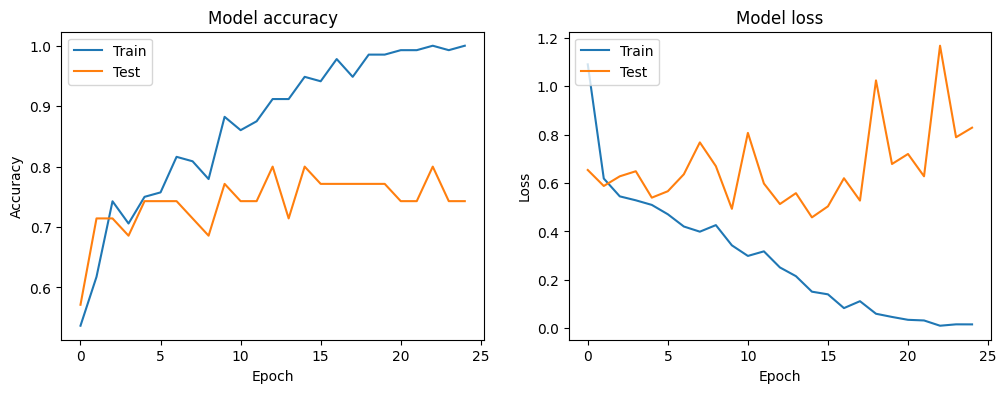

In [25]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

#Make Prediction and Evaluate Using Confusion Matrix

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [27]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

2/2 [==============================] - 0s 28ms/step


<Figure size 800x600 with 0 Axes>

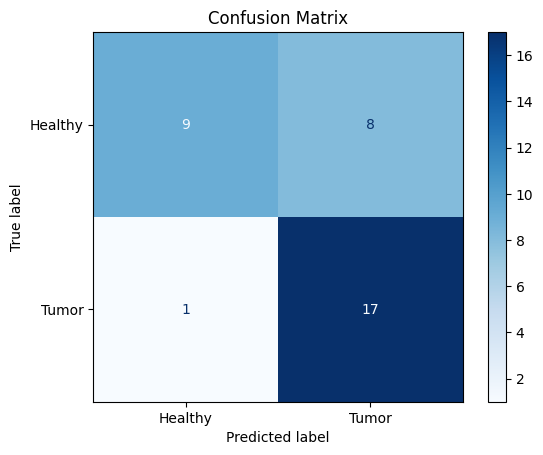

In [28]:
# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Healthy', 'Tumor'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()

#Train the Model using batch size of 64


In [29]:
# Compile the model
learning_rate = 0.001  # Hyperparameter
# optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Hyperparameters
batch_size = 64
epochs = 25

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/25
3/3 [==============================] - 5s 1s/step - loss: 0.1749 - accuracy: 0.9485 - val_loss: 0.4857 - val_accuracy: 0.8857
Epoch 2/25
3/3 [==============================] - 6s 2s/step - loss: 0.0811 - accuracy: 0.9706 - val_loss: 0.5121 - val_accuracy: 0.7429
Epoch 3/25
3/3 [==============================] - 4s 1s/step - loss: 0.0335 - accuracy: 1.0000 - val_loss: 0.8159 - val_accuracy: 0.7714
Epoch 4/25
3/3 [==============================] - 5s 1s/step - loss: 0.0300 - accuracy: 1.0000 - val_loss: 1.0849 - val_accuracy: 0.7714
Epoch 5/25
3/3 [==============================] - 6s 2s/step - loss: 0.0317 - accuracy: 0.9926 - val_loss: 0.8163 - val_accuracy: 0.7429
Epoch 6/25
3/3 [==============================] - 4s 1s/step - loss: 0.0135 - accuracy: 1.0000 - val_loss: 0.8165 - val_accuracy: 0.7429
Epoch 7/25
3/3 [==============================] - 4s 1s/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 1.0022 - val_accuracy: 0.7429
Epoch 8/25
3/3 [=========================

#Evaluate the Model

In [30]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

2/2 [==============================] - 1s 48ms/step - loss: 1.3704 - accuracy: 0.7429
Test Loss: 1.3703709840774536
Test Accuracy: 0.7428571581840515


#Visualize the Training History

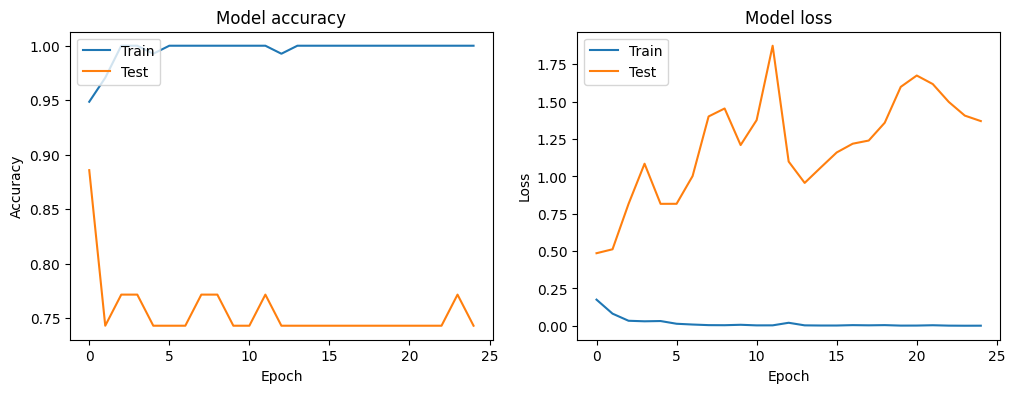

In [31]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

#Make Prediction and Evaluate Using Confusion Matrix

In [32]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)


2/2 [==============================] - 0s 38ms/step


<Figure size 800x600 with 0 Axes>

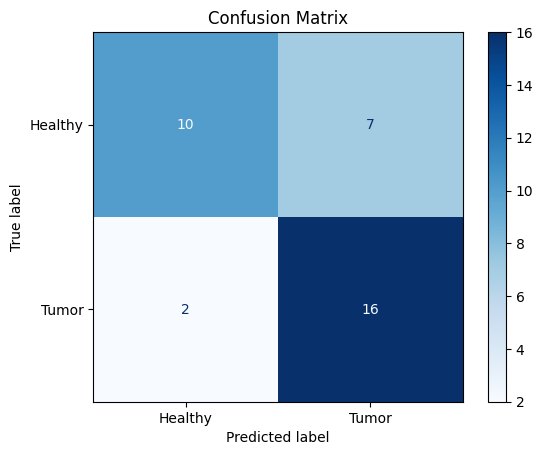

In [33]:
# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Healthy', 'Tumor'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()

#Training the Model using 30 ephocs

In [34]:
# Compile the model
learning_rate = 0.001  # Hyperparameter
# optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Hyperparameters
batch_size = 64
epochs = 30

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/30
3/3 [==============================] - 5s 1s/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 1.5382 - val_accuracy: 0.7429
Epoch 2/30
3/3 [==============================] - 6s 2s/step - loss: 4.1474e-04 - accuracy: 1.0000 - val_loss: 2.9800 - val_accuracy: 0.7429
Epoch 3/30
3/3 [==============================] - 4s 1s/step - loss: 0.0096 - accuracy: 0.9926 - val_loss: 1.3261 - val_accuracy: 0.8000
Epoch 4/30
3/3 [==============================] - 4s 1s/step - loss: 0.0149 - accuracy: 0.9926 - val_loss: 2.8367 - val_accuracy: 0.7429
Epoch 5/30
3/3 [==============================] - 6s 2s/step - loss: 0.0662 - accuracy: 0.9853 - val_loss: 1.9718 - val_accuracy: 0.7714
Epoch 6/30
3/3 [==============================] - 4s 1s/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 1.2669 - val_accuracy: 0.7714
Epoch 7/30
3/3 [==============================] - 4s 1s/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.9902 - val_accuracy: 0.7429
Epoch 8/30
3/3 [=====================

#Evaluate the Model

In [35]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

2/2 [==============================] - 0s 30ms/step - loss: 2.0143 - accuracy: 0.8000
Test Loss: 2.014340400695801
Test Accuracy: 0.800000011920929


#Visualize the Training History

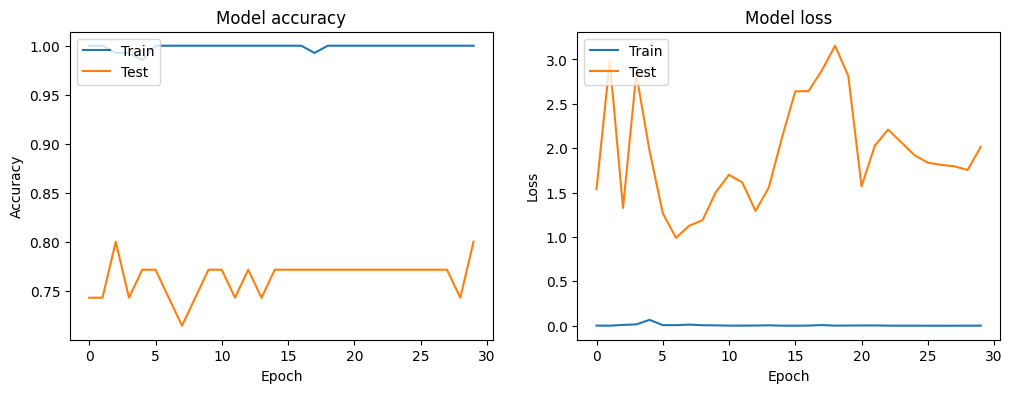

In [36]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

#Make Prediction and Evaluate using Confusion Matrix

In [37]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

2/2 [==============================] - 0s 28ms/step


<Figure size 800x600 with 0 Axes>

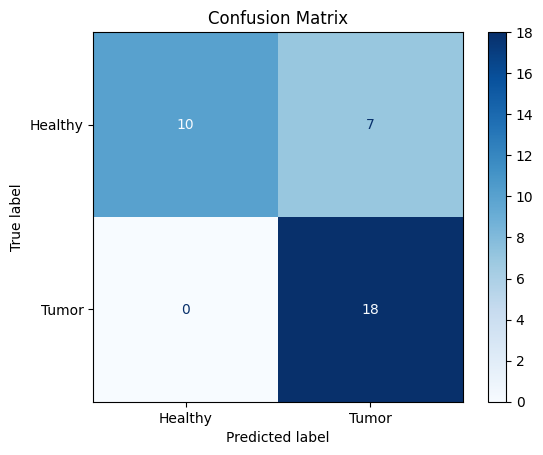

In [38]:
# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Healthy', 'Tumor'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()

#Applying the Learning Rate

In [53]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

In [54]:
# Define the optimizer
optimizer = Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08
)

# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
# Hyperparameters
batch_size = 64
epochs = 30

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/30
3/3 [==============================] - 7s 1s/step - loss: 1.0019e-04 - accuracy: 1.0000 - val_loss: 3.7433 - val_accuracy: 0.7714
Epoch 2/30
3/3 [==============================] - 4s 1s/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 2.5258 - val_accuracy: 0.7429
Epoch 3/30
3/3 [==============================] - 6s 2s/step - loss: 3.4016e-05 - accuracy: 1.0000 - val_loss: 3.0832 - val_accuracy: 0.7714
Epoch 4/30
3/3 [==============================] - 4s 1s/step - loss: 0.0218 - accuracy: 0.9853 - val_loss: 3.2885 - val_accuracy: 0.7714
Epoch 5/30
3/3 [==============================] - 4s 1s/step - loss: 0.0117 - accuracy: 0.9926 - val_loss: 2.0380 - val_accuracy: 0.7714
Epoch 6/30
3/3 [==============================] - 6s 2s/step - loss: 3.0851e-04 - accuracy: 1.0000 - val_loss: 1.2945 - val_accuracy: 0.7714
Epoch 7/30
3/3 [==============================] - 4s 1s/step - loss: 9.3443e-04 - accuracy: 1.0000 - val_loss: 1.1169 - val_accuracy: 0.7714
Epoch 8/30
3/3 [=========

#Evaluate the Model

In [56]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

2/2 [==============================] - 1s 61ms/step - loss: 2.0564 - accuracy: 0.7429
Test Loss: 2.056442975997925
Test Accuracy: 0.7428571581840515


#Visualize the Training History

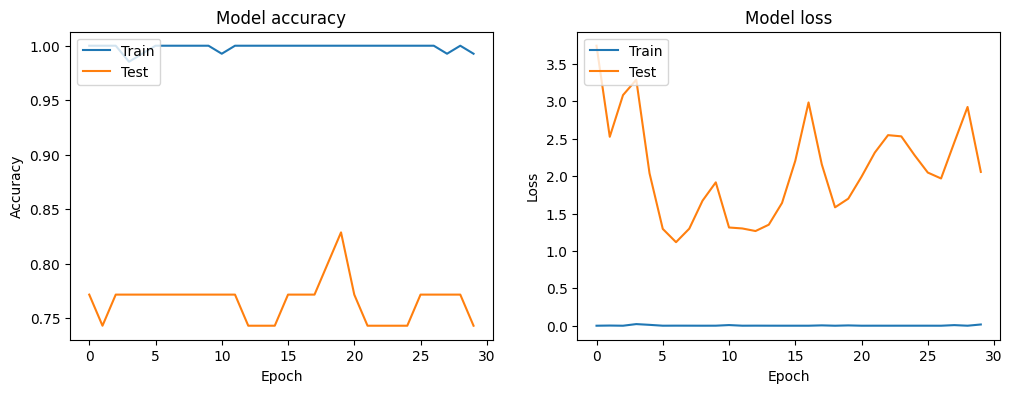

In [57]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

#Make Prediction and Evaluate using Confusion Matrix

In [58]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

2/2 [==============================] - 0s 32ms/step


<Figure size 800x600 with 0 Axes>

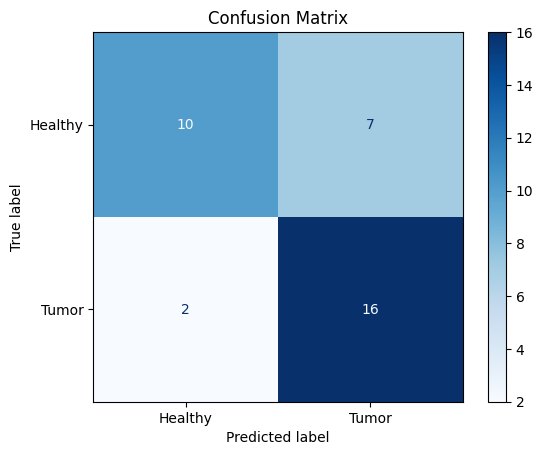

In [59]:
# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Healthy', 'Tumor'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()